In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import*
from sklearn.linear_model import*
import keras
from keras.layers import*
from keras.models import*
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier

In [ ]:
data_path = '/content/diabetes_data_upload.csv'

In [ ]:
df = pd.read_csv(data_path)
df.head(10)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,Male,No,Yes,No,Yes,No,No,No,Yes,No,Yes,No,Yes,Yes,Yes,Positive
1,58,Male,No,No,No,Yes,No,No,Yes,No,No,No,Yes,No,Yes,No,Positive
2,41,Male,Yes,No,No,Yes,Yes,No,No,Yes,No,Yes,No,Yes,Yes,No,Positive
3,45,Male,No,No,Yes,Yes,Yes,Yes,No,Yes,No,Yes,No,No,No,No,Positive
4,60,Male,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Positive
5,55,Male,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,No,Yes,Yes,Yes,Positive
6,57,Male,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,Yes,No,No,No,Positive
7,66,Male,Yes,Yes,Yes,Yes,No,No,Yes,Yes,Yes,No,Yes,Yes,No,No,Positive
8,67,Male,Yes,Yes,No,Yes,Yes,Yes,No,Yes,Yes,No,Yes,Yes,No,Yes,Positive
9,70,Male,No,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,No,No,Yes,No,Positive


In [ ]:
df.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

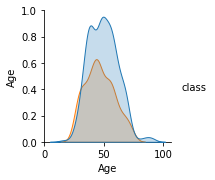

In [ ]:
X = df.drop('class',axis=1)
y = df['class']

In [ ]:
feature_classes = ['Gender','Polyuria','Polydipsia','sudden weight loss','weakness','Polyphagia','Genital thrush','visual blurring','Itching','Irritability','delayed healing'
,'partial paresis','muscle stiffness','Alopecia','Obesity']
x=[]

In [ ]:
length = len(feature_classes)
for i in range(length):
  X[feature_classes[i]] = LabelEncoder().fit_transform(X[feature_classes[i]])

#male = 0, female =1
#No =0, yes = 1


In [ ]:
X.head()

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,0,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,0,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,0,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [ ]:
y = LabelEncoder().fit_transform(y) #positive = 1; negative = 0 

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(364, 16)
(364,)
(156, 16)
(156,)


In [ ]:
from sklearn.preprocessing import StandardScaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [ ]:
#logistic_Regression
lr_class = LogisticRegression()
model = lr_class.fit(X_train,y_train)
print("***Model State***")
print(model)

***Model State***
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [ ]:
#predictions
predict = model.predict(X_test)
print(predict)

[1 0 0 0 1 1 1 1 1 0 1 1 0 0 0 1 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 1 0 1 1 0 1
 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 0 1 0 1 0 1 1
 1 0 1 1 0 0 1 0 0 1 1 1 0 1 1 0 0 0 0 0 1 1 1 1 1 0 0 0 1 1 0 0 1 0 1 0 0
 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1
 0 1 0 1 0 1 0 1]


In [ ]:
#accuracy
acc = model.score(X_test,y_test)
print(f"The model is {acc}% accurate")

The model is 0.8525641025641025% accurate


In [ ]:
#neural network
def create_model():
  nn = Sequential()
  nn.add(Dense(32,input_dim=16,activation='relu'))
  nn.add(Dense(64,activation='relu'))
  nn.add(Dense(128,activation='relu'))
  nn.add(Dense(1,activation='sigmoid'))

  nn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

  return nn
  

In [ ]:
#grid search
network = KerasClassifier(build_fn=create_model,verbose=0)
batch_size = [10, 20, 40, 60, 80, 100]
epochs = [10, 50, 100]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=network, param_grid=param_grid, n_jobs=-1, cv=3)
grid_result = grid.fit(X_train, y_train)

#results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.950571 using {'batch_size': 40, 'epochs': 50}
0.923091 (0.007637) with: {'batch_size': 10, 'epochs': 10}
0.947907 (0.027753) with: {'batch_size': 10, 'epochs': 50}
0.936775 (0.010489) with: {'batch_size': 10, 'epochs': 100}
0.936842 (0.010092) with: {'batch_size': 20, 'epochs': 10}
0.950549 (0.006751) with: {'batch_size': 20, 'epochs': 50}
0.936842 (0.015442) with: {'batch_size': 20, 'epochs': 100}
0.903920 (0.019001) with: {'batch_size': 40, 'epochs': 10}
0.950571 (0.006555) with: {'batch_size': 40, 'epochs': 50}
0.936842 (0.015442) with: {'batch_size': 40, 'epochs': 100}
0.870975 (0.039133) with: {'batch_size': 60, 'epochs': 10}
0.917604 (0.030858) with: {'batch_size': 60, 'epochs': 50}
0.923136 (0.025315) with: {'batch_size': 60, 'epochs': 100}
0.890010 (0.027538) with: {'batch_size': 80, 'epochs': 10}
0.901120 (0.006392) with: {'batch_size': 80, 'epochs': 50}
0.925936 (0.033353) with: {'batch_size': 80, 'epochs': 100}
0.857065 (0.039185) with: {'batch_size': 100, 'epochs': 

In [ ]:
#final network
diabnet = Sequential()
diabnet.add(Dense(32,input_dim=16,activation='relu'))
diabnet.add(Dense(64,activation='relu'))
diabnet.add(Dense(128,activation='relu'))
diabnet.add(Dense(1,activation='sigmoid'))

diabnet.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
diabnet.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_11 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_12 (Dense)             (None, 128)               8320      
_________________________________________________________________
dense_13 (Dense)             (None, 1)                 129       
Total params: 11,105
Trainable params: 11,105
Non-trainable params: 0
_________________________________________________________________


In [ ]:
#fitting the model
result = diabnet.fit(X_train,y_train,batch_size=40,epochs=50)

Epoch 1/50
10/10 [==============================] - 0s 2ms/step - loss: 0.2457 - accuracy: 0.9148
Epoch 2/50
10/10 [==============================] - 0s 3ms/step - loss: 0.1810 - accuracy: 0.9313
Epoch 3/50
10/10 [==============================] - 0s 2ms/step - loss: 0.1471 - accuracy: 0.9533
Epoch 4/50
10/10 [==============================] - 0s 2ms/step - loss: 0.1286 - accuracy: 0.9615
Epoch 5/50
10/10 [==============================] - 0s 2ms/step - loss: 0.1110 - accuracy: 0.9615
Epoch 6/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0970 - accuracy: 0.9670
Epoch 7/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0877 - accuracy: 0.9753
Epoch 8/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0749 - accuracy: 0.9753
Epoch 9/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0686 - accuracy: 0.9753
Epoch 10/50
10/10 [==============================] - 0s 2ms/step - loss: 0.0586 - accuracy: 0.9835
Epoch 11/50
10/10 [

In [ ]:
#acc on test data
print("Test Data Accuracy")
acc = diabnet.evaluate(X_test,y_test)

Test Data Accuracy
5/5 [==============================] - 0s 2ms/step - loss: 0.2905 - accuracy: 0.9295


In [ ]:
y_pred = diabnet.predict(X_test)
print(y_pred)

[[1.0000000e+00]
 [2.2896886e-02]
 [1.3172628e-05]
 [9.2274761e-01]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [3.4421682e-03]
 [9.9927580e-01]
 [6.6516191e-02]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.3172628e-05]
 [9.7919536e-01]
 [9.9990904e-01]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.4951527e-03]
 [4.3495536e-02]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [8.8047802e-02]
 [9.9973488e-01]
 [1.0000000e+00]
 [2.7809262e-02]
 [1.0000000e+00]
 [9.1255134e-07]
 [1.0117802e-01]
 [1.0000000e+00]
 [8.8047743e-02]
 [8.6463165e-01]
 [1.4134645e-03]
 [9.9980974e-01]
 [1.0000000e+00]
 [7.0976615e-03]
 [9.9998295e-01]
 [9.9999893e-01]
 [1.0000000e+00]
 [4.3165684e-04]
 [1.0000000e+00]
 [1.0000000e+00]
 [9.9949026e-01]
 [1.0000000e+00]
 [1.0000000e+00]
 [9.9999845e-01]
 [9.9871606e-01]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.0000000e+00]
 [1.6836822e-03]
 [9.9990189e-01]
 [1.0000000e+00]
 [4.5329332e-04]
 [2.3405322e-05]
 [4.7138333e-04]
 [9.9996984e-01]
 [1.0000000e+00]
 [8.8825226e-0

In [ ]:
#sample input
inp = np.array([40,0,0,1,0,1,0,0,0,1,0,1,0,1,1,1])
i = np.expand_dims(inp,axis=0)
pred = diabnet.predict(i)


print(pred)


[[0.00958309]]


In [ ]:
58,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0